In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
# style.use("ggplot")
style.use('seaborn-poster')
from scipy.optimize import curve_fit
import os
import numpy as np
import glob
import scipy as sc

In [42]:
from scipy import stats

def linearRegression(df):
    x = df[df.DiscoveryTime.notnull()].trialNum.values
    y = df[df.DiscoveryTime.notnull()].DiscoveryTime.values

    slope, intercept, r_value, p_value, std_err = sc.stats.linregress(x, y)
    
    return(slope, intercept, r_value, p_value, std_err)

In [43]:
# Define exponential function func,  
# where a = alpha, b = Tau, c = y intercept

def fit_to_exponential(x, a, b, c):
     return a * np.exp(-(x / b)) + c

# Individual floral shape

In [44]:
direc = r'C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Old\Old_Step5'

outpath = r'C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Old\Old_Step6'
outpath_fig = r'C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Old\Old_Step6\Figure'
outpath_2 = r"C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Old\Old_Step6\Fodder"

Save the all shape specific files as a single file

In [45]:
Lightlevel = ['L0.1', 'L50']


for Lightlevel in Lightlevel:
    
    Light_specific_file = glob.glob(direc + "\\" + Lightlevel + '*Raw*.csv')
       
    # get the data together and save as single dataset
    
    df1=[]
    df2=[]
    df3=[]
    df4=[]
    df5=[]
    df6=[]

    ctr = 0
    for fpath in Light_specific_file:
        df = pd.read_csv(fpath)
        DiscoveryTime = df['DiscoveryTime']
        trialNum= df.index
        fname = os.path.basename(fpath)[:-30]
        names = [fname]*len(trialNum)
        mothIn = df['In_Frame']
        mothOut = df['Out_Frame']
        Proboscis = df['ProboscisDetect']

        df1.extend(DiscoveryTime)
        df2.extend(trialNum)
        df3.extend(names)
        df4.extend(mothIn)
        df5.extend(mothOut)
        df6.extend(Proboscis)
        ctr+=1
        print(ctr)

    new_df = (pd.DataFrame({'In_Frame' : df4, 'Out_Frame' : df5, 'Proboscis' : df6,
                            'DiscoveryTime': df1, 'trialNum': df2, 'name' : df3}))
    print(Lightlevel + '\t' + "has a total of" + '\t'+ str(ctr) + '\t' + "moths")
    new_df.to_csv(outpath + "\\" + Lightlevel + "Allmoths.csv")

1
2
3
4
5
6
7
8
9
10
L0.1	has a total of	10	moths
1
2
3
4
5
6
7
8
9
L50	has a total of	9	moths


In [46]:
import glob



dFrame = pd.DataFrame()

file = glob.glob(outpath + "\\" + '*Allmoths.csv')

for file in file:
    print(file)
    df = pd.read_csv(file)
    dFrame = dFrame.append(df)
dFrame.to_csv(outpath  + "\\" + "AllLight_AllMoths.csv")

C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Old\Old_Step6\L0.1Allmoths.csv
C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Old\Old_Step6\L50Allmoths.csv


Fit to curve and plot

In [47]:
from matplotlib.pyplot import cm
nam_50 = dFrame.name[dFrame.name.str.contains('L')].unique()
len(nam_50)

19

In [48]:
n = len(nam_50)
color = cm.tab20b(np.linspace(0,1,n))

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


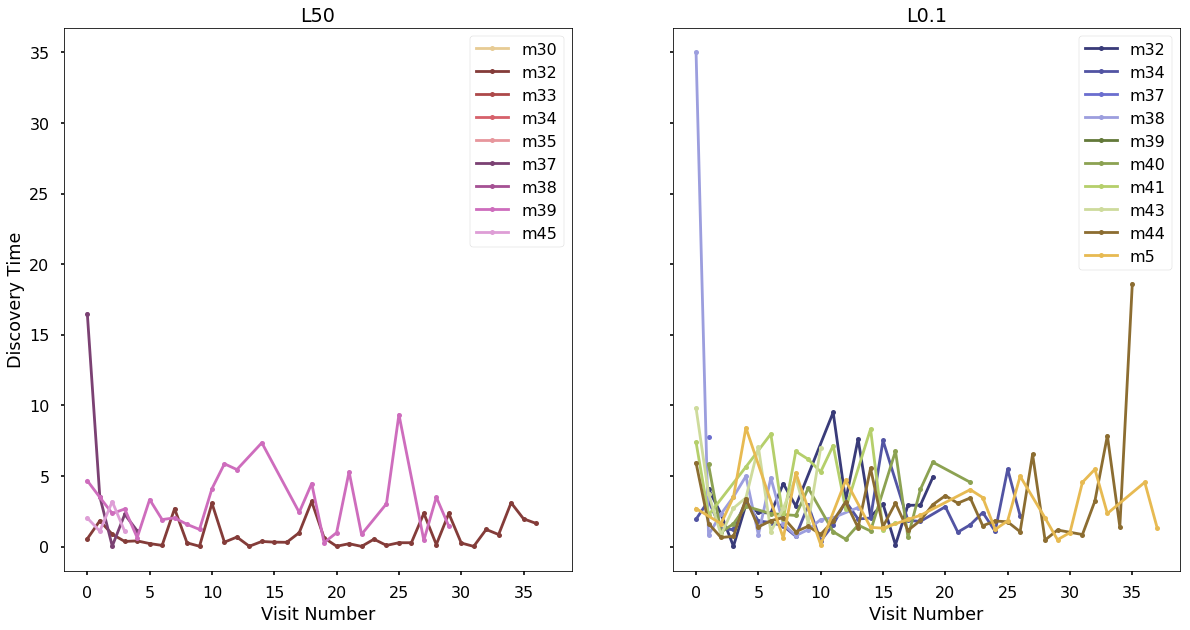

In [49]:
f, ax = plt.subplots(1,2, figsize = (20,10), sharex = True, sharey = True)
for name,c in zip(nam_50,color):
    
    
    if name.startswith('L50'):
        x = dFrame[(dFrame.name == name) & (dFrame.DiscoveryTime.notnull())].trialNum
        y = dFrame[(dFrame.name == name) & (dFrame.DiscoveryTime.notnull())].DiscoveryTime
        ax[0].plot(x, y/100, 'o-', markersize = 5, label = name[8:], color = c)

    else:
        x = dFrame[(dFrame.name == name) & (dFrame.DiscoveryTime.notnull())].trialNum
        y = dFrame[(dFrame.name == name) & (dFrame.DiscoveryTime.notnull())].DiscoveryTime
        ax[1].plot(x, y/100, 'o-', markersize = 5, label = name[9:], color = c)
        
    ax[0].set_ylabel('Discovery Time')
    ax[0].set_xlabel('Visit Number')
    ax[1].set_xlabel('Visit Number')
    ax[0].set_title('L50')
    ax[1].set_title('L0.1')
    ax[0].legend()
    ax[1].legend()

['C:\\Users\\Daniellab\\Desktop\\Light_level_videos_second_batch\\Data\\Old\\Old_Step6\\L0.1Allmoths.csv']


C:\Users\Daniellab\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


['C:\\Users\\Daniellab\\Desktop\\Light_level_videos_second_batch\\Data\\Old\\Old_Step6\\L50Allmoths.csv']


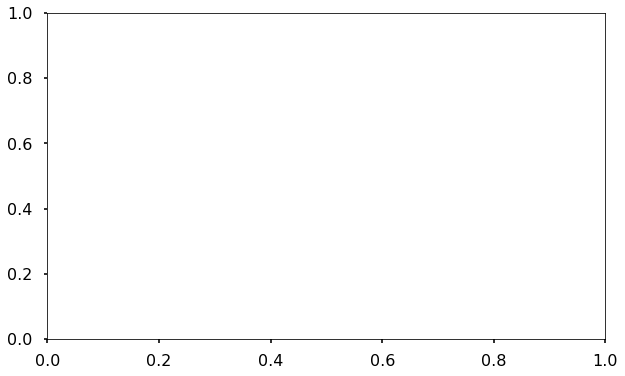

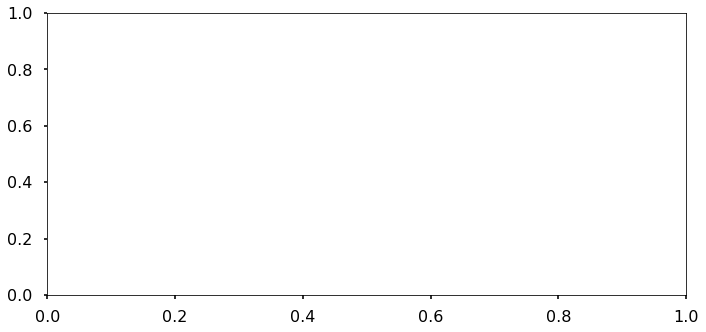

In [50]:
# do the fit for three different y0 - computed across different lengths of the saturation - curve
Lightlevel = ['L0.1','L50']
fig1, ax0 = plt.subplots(figsize = (10,6))
fig2, ax1 = plt.subplots(figsize = (10,6))

for Lightlevel in Lightlevel:
    
    file  = glob.glob(outpath + "\\" + Lightlevel + 'Allmoths.csv')
    print(file)

    new_df = pd.read_csv(file[0])
    
    xdata = new_df.trialNum.values
    ydata = new_df.DiscoveryTime.values
    
    xdata_notnan = new_df[new_df.DiscoveryTime.notnull()].trialNum.values
    ydata_notnan = new_df[new_df.DiscoveryTime.notnull()].DiscoveryTime.values
    
    numMoth = len(new_df.name.unique())
    
    length_to_estimate_y0 = [2,4,8]

    # initialize all the variables you want to save
    slope = []
    std_err = []
    p_value = []
    r_value = []
    y_intercept = []
    y_intercept_std_dev = []
    average_firstTrial = []
    alpha = []
    tau= []
    covariance = []

    for length in length_to_estimate_y0:
        totalTrial = max(new_df.trialNum)
        part_of_df = new_df[new_df.trialNum >= (totalTrial * (1-1/length))]
        x = part_of_df[part_of_df.DiscoveryTime.notnull()].trialNum.values
        y = part_of_df[part_of_df.DiscoveryTime.notnull()].DiscoveryTime.values
        m, y0, r_val, p_val, se = linearRegression(part_of_df)

        mean_y0 = part_of_df.DiscoveryTime.mean()
        std_y0 = part_of_df.DiscoveryTime.std()
        mean_a0andy0 = new_df[new_df.trialNum==0].DiscoveryTime.mean()
        a0 = mean_a0andy0 - mean_y0

#         # plot the regression line
#         x = part_of_df.trialNum
#         y = part_of_df.DiscoveryTime
#         ax0.plot(x,y*1/100, 'ob', markersize=5, alpha=.5, label = 'Raw data')
#         test_x = range(min(x)-5, max(x)+5)
#         ax0.plot(test_x, (m*test_x + y0)*1/100, label = 'Fitted line')
#         ax0.fill_between(test_x, ((m-se)*test_x + y0)*1/100, ((m+se)*test_x + y0)*1/100, alpha=0.2)
#         ax0.set_title(Lightlevel + '_1/' + str(length) + '_lengthData')
#         ax0.legend()
#         fig1.savefig(outpath_fig + Lightlevel + '_1-' + str(length) + '_LinearRegression.svg')
#         ax0.cla()

        slope.append(m/100)
        std_err.append(se/100)
        p_value.append(p_val)
        r_value.append(r_val)
        y_intercept.append(mean_y0/100)
        y_intercept_std_dev.append(std_y0/100)
        average_firstTrial.append(mean_a0andy0/100)
        alpha.append(a0/100)
        
        
        popt,pcov = curve_fit(lambda x, b: fit_to_exponential(x, a0, b, mean_y0), xdata_notnan, ydata_notnan)
        tau.append(popt[0]/100)
        covariance.append(pcov.flatten()[0])

        # plot the final curve fit
        max_trial=max(xdata)
        ax1.plot(xdata, ydata*1/100, 'or', markersize=7, alpha=.5, label = 'Raw data')
        ax1.plot(range(0,max_trial), fit_to_exponential(range(0,max_trial), a0, *popt, mean_y0)*1/100, 
                 'g--', linewidth=2, 
                 label = 'fit: alpha= %5.3f , Tau= %5.3f, y0= %5.3f' %(a0/100, popt/100, mean_y0/100))

        ax1.set_title(Lightlevel + '_1-' + str(length) + '_length', y=1.2)
        ax1.set_xlabel('Trial number')
        ax1.set_ylabel('Exploration Time (second)')
        leg = plt.legend()
        leg.get_frame().set_linewidth(1.5)
        ax1.legend(bbox_to_anchor=(0., 1.05, 1., .102), loc=3, mode="expand", borderaxespad=0.)
        ax1.set_xlim([-5,90])
        ax1.set_ylim([-5,55])
        ax1.text(60, 40, 'N= ' + str(numMoth))
        fig2.tight_layout()
        fig2.savefig(outpath_fig + "\\" + 'LearningCurve_' + Lightlevel + '_1-' + str(length) + '_length.svg')
        ax1.cla()

    all_param_df = pd.DataFrame({'slope':slope, 'std_err':std_err,
                                 'p_value':p_value, 'r_value':r_value,
                                 'y_intercept':y_intercept,
                                 'y_intercept_std' : y_intercept_std_dev,
                                 'average_firstTrial':average_firstTrial,
                                 'alpha':alpha,'tau':tau,
                                 'covariance':covariance}, 
                                index = ['one-half', 'last fourth', 'last eight'])
    all_param_df.to_csv(outpath + "\\" + Lightlevel + '_FittedParameters.csv')

In [86]:
y.size

5

['C:\\Users\\Daniellab\\Desktop\\Light_level_videos_second_batch\\Data\\Old\\Old_Step6\\L0.1Allmoths.csv']
['C:\\Users\\Daniellab\\Desktop\\Light_level_videos_second_batch\\Data\\Old\\Old_Step6\\L50Allmoths.csv']


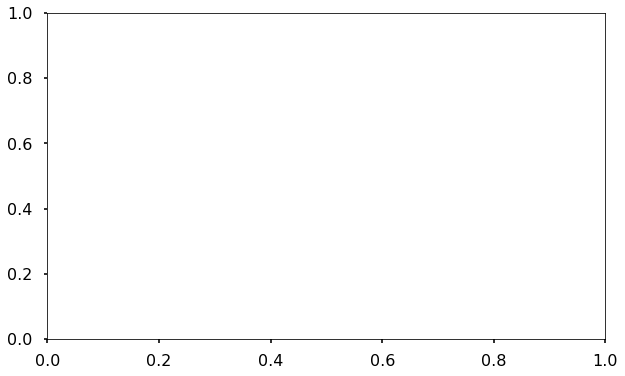

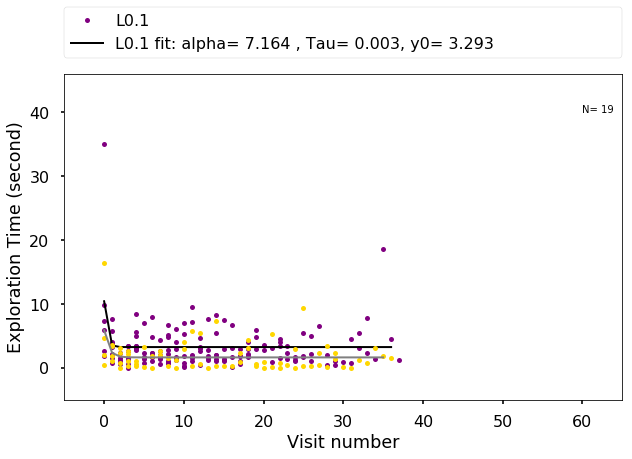

In [51]:
Lightlevel = ['L0.1', "L50"]
fig = plt.subplots(figsize = (10,6))
x_nan = []
y_nan = []
fig1, ax0 = plt.subplots(figsize = (10,6))
for Lightlevel in Lightlevel:
    
    file  = glob.glob(outpath + "\\" + Lightlevel + 'Allmoths.csv')
    print(file)
    new_df = pd.read_csv(file[0])
    
    xdata_notnan = new_df[new_df.DiscoveryTime.notnull()].trialNum.values
    ydata_notnan = new_df[new_df.DiscoveryTime.notnull()].DiscoveryTime.values
    
    if Lightlevel.startswith('L50'):
        length_to_estimate_y0 = 2
        x = dFrame[dFrame.name.str.contains(Lightlevel) & dFrame.DiscoveryTime.notnull()].trialNum
        y = dFrame[dFrame.name.str.contains(Lightlevel) & dFrame.DiscoveryTime.notnull()].DiscoveryTime
        plt.plot(x, y/100, 'o', markersize = 5, label = Lightlevel, color = 'gold')
        
    else:
        length_to_estimate_y0 = 2
        x = dFrame[dFrame.name.str.contains(Lightlevel) & dFrame.DiscoveryTime.notnull()].trialNum
        y = dFrame[dFrame.name.str.contains(Lightlevel) & dFrame.DiscoveryTime.notnull()].DiscoveryTime
        plt.plot(x, y/100, 'o', markersize = 5, label = Lightlevel, color = 'purple')
    
    
    xdata_notnan = new_df[new_df.DiscoveryTime.notnull()].trialNum.values
    ydata_notnan = new_df[new_df.DiscoveryTime.notnull()].DiscoveryTime.values
    
    x_nan.append(xdata_notnan)
    y_nan.append(ydata_notnan)
    
    totalTrial = max(new_df.trialNum)
    part_of_df = new_df[new_df.trialNum >= (totalTrial * (1-1/length_to_estimate_y0))]
    part_of_df

    m, y0, r_val, p_val, se = linearRegression(part_of_df)

    mean_y0 = part_of_df.DiscoveryTime.mean()
    std_y0 = part_of_df.DiscoveryTime.std()
    mean_a0andy0 = new_df[new_df.trialNum==0].DiscoveryTime.mean()
    a0 = mean_a0andy0 - mean_y0
    
    popt,pcov = curve_fit(lambda x, b: fit_to_exponential(x, a0, b, mean_y0), xdata_notnan, ydata_notnan)
    
    
    if Lightlevel.startswith('L50'):
        plt.plot(range(0,totalTrial), fit_to_exponential(range(0,totalTrial), a0, *popt, mean_y0)*1/100, 
                     'gray', linewidth=2, 
                     label = str(Lightlevel) + ' ' + 'fit: alpha= %5.3f , Tau= %5.3f, y0= %5.3f' %(a0/100, popt/100, mean_y0/100))
    else:
        plt.plot(range(0,totalTrial), fit_to_exponential(range(0,totalTrial), a0, *popt, mean_y0)*1/100, 
                     'k', linewidth=2, 
                     label = str(Lightlevel) + ' ' + 'fit: alpha= %5.3f , Tau= %5.3f, y0= %5.3f' %(a0/100, popt/100, mean_y0/100))

        plt.xlabel('Visit number')
        plt.ylabel('Exploration Time (second)')
        leg = plt.legend()
        leg.get_frame().set_linewidth(1.5)
        plt.legend(bbox_to_anchor=(0., 1.05, 1., .102), loc=3, mode="expand", borderaxespad=0.)
        plt.xlim([-5,65])
        plt.ylim([-5,46])
        plt.text(60, 40, 'N= ' + str(len(nam_50)))
#     fig1.tight_layout()
#     fig1.savefig(outpath_fig + "\\" + 'Alldata_LearningCurve' + '.png')

In [120]:
part_of_df

,Unnamed: 0,In_Frame,Out_Frame,Proboscis,DiscoveryTime,trialNum,name
46,46,92776,93146,NaN,NaN,46,L0.1_c-3_m10
47,47,93515,93806,NaN,NaN,47,L0.1_c-3_m10
48,48,94960,95786,NaN,NaN,48,L0.1_c-3_m10
49,49,96697,97363,NaN,NaN,49,L0.1_c-3_m10
50,50,97775,98076,NaN,NaN,50,L0.1_c-3_m10
51,51,98255,98546,NaN,NaN,51,L0.1_c-3_m10
52,52,99052,99386,NaN,NaN,52,L0.1_c-3_m10
53,53,101915,102266,NaN,NaN,53,L0.1_c-3_m10
54,54,103657,104980,NaN,NaN,54,L0.1_c-3_m10
55,55,105568,105848,NaN,NaN,55,L0.1_c-3_m10
